In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
(ds_train, ds_test), ds_info = tfds.load('cats_vs_dogs', split=['train[:80%]', 'train[80%:]'],
                                         with_info=True, as_supervised=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.9FXXO5_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [3]:
IMG_SIZE = 128  # Resize all images to 128x128

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

ds_train = ds_train.map(preprocess).batch(32).shuffle(buffer_size=1000)
ds_test = ds_test.map(preprocess).batch(32)


In [4]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (cats vs. dogs)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(ds_train, epochs=50, validation_data=ds_test)


Epoch 1/8
582/582 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.5854 - loss: 0.6698 - val_accuracy: 0.6195 - val_loss: 0.6291
Epoch 2/8
582/582 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.7539 - loss: 0.4876 - val_accuracy: 0.7726 - val_loss: 0.4687
Epoch 3/8
582/582 ━━━━━━━━━━━━━━━━━━━━ 35s 24ms/step - accuracy: 0.8197 - loss: 0.3970 - val_accuracy: 0.8218 - val_loss: 0.3905
Epoch 4/8
582/582 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.8585 - loss: 0.3231 - val_accuracy: 0.8169 - val_loss: 0.4269
Epoch 5/8
582/582 ━━━━━━━━━━━━━━━━━━━━ 43s 25ms/step - accuracy: 0.9031 - loss: 0.2332 - val_accuracy: 0.8224 - val_loss: 0.4138
Epoch 6/8
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9367 - loss: 0.1583 - val_accuracy: 0.8325 - val_loss: 0.4733
Epoch 7/8
582/582 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9694 - loss: 0.0864 - val_accuracy: 0.8285 - val_loss: 0.5180
Epoch 8/8
582/582 ━━━━━━━━━━━━━━━━━━━━ 34s 25ms/step - accuracy: 0.9850 - loss: 0.0478 - val_accu

In [7]:
test_loss, test_acc = model.evaluate(ds_test)
print("\nTest Accuracy:", test_acc)


146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.8053 - loss: 0.7800

Test Accuracy: 0.8095442652702332


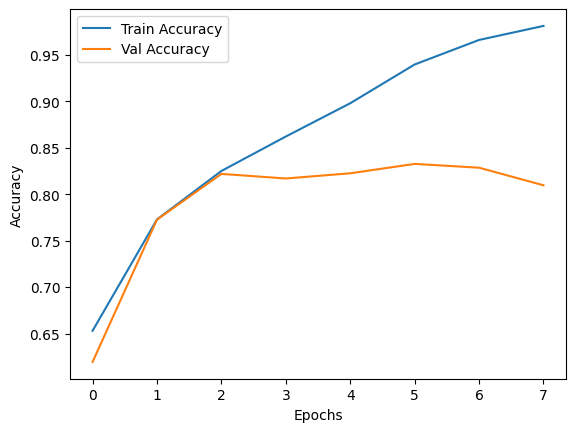

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
for images, labels in ds_test.take(1):  # Take one batch
    predictions = model.predict(images)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy())
        plt.title("Pred: " + ("Dog" if predictions[i] > 0.5 else "Cat"))
        plt.axis("off")
    plt.show()
